## Store Sales Forecasting

Packages

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Data Collection

#### 1.1. Describe the data set.
The dataset is a comprehensive collection of over **9000+ orders** from various customers across different regions. It comprises **17 columns** and **9800 rows**.

Our goal is to **predict the sales** of the products based on the given features.

## **Features**
1. **Row ID** 
2. **Order ID**: Unique ID for each order
3. **Order Date**: Date of the order
4. **Ship Date**: Date of the shipment
5. **Ship Mode**: Mode of shipment
6. **Customer ID**: Unique ID for each customer
7. **Customer Name**: Name of the customer
8. **Segment**: Segment of the customer
9. **Country**: Country of the customer
10. **City**: City of the customer
11. **State**: State of the customer
12. **Postal Code**: Postal code of the customer
13. **Region**: Region of the customer
14. **Product ID**: Unique ID for each product
15. **Category**: Category of the product
16. **Sub-Category**: Sub-Category of the product
17. **Product Name**: Name of the product
18. **Sales**: Sales of the product

To access the dataset, click [https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data](https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting/data).

In [52]:
# load CSV file 
df = pd.read_csv("C:/Users/bibov/OneDrive/Documents/Data Analysis Final Req/train.csv")

In [53]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# 2. Data Preperation

#### 2.1 Data Inspection 🔍
 Checking the data types, looking for missing values, and understanding the categorical feilds.

In [54]:
# checking the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [55]:
# check the number of rows and columns
df.shape

(9800, 18)

#### 2.2 Data Cleaning 🧹
Removing the missing values, duplicates, or irrelevant data. Also, we will be removing the columns that are not required for our analysis and for the ethical reasons.

Transforming the data into a format that is suitable for analysis.

Based on the output of checking the data types, we can see that the data types of the date columns are not correct, and the postal code are in float type, postal codes are usually not used in mathematical operations, so we will change it to string type.

In [56]:
# Date conversion
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# postal code conversion
df['Postal Code'] = df['Postal Code'].astype(str)

# checking the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

In [57]:
# check for missing values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

the output of checking the missing values shows that there are no missing values in the dataset.

In [58]:
# removing unnecessary columns like postal code, costumer id and costumer name 

df.drop(['Postal Code', 'Customer ID', 'Customer Name'], axis=1, inplace=True)

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


# 3. Exploratory Data Analysis

#### 3.1 Analyze the distribution of products.📊

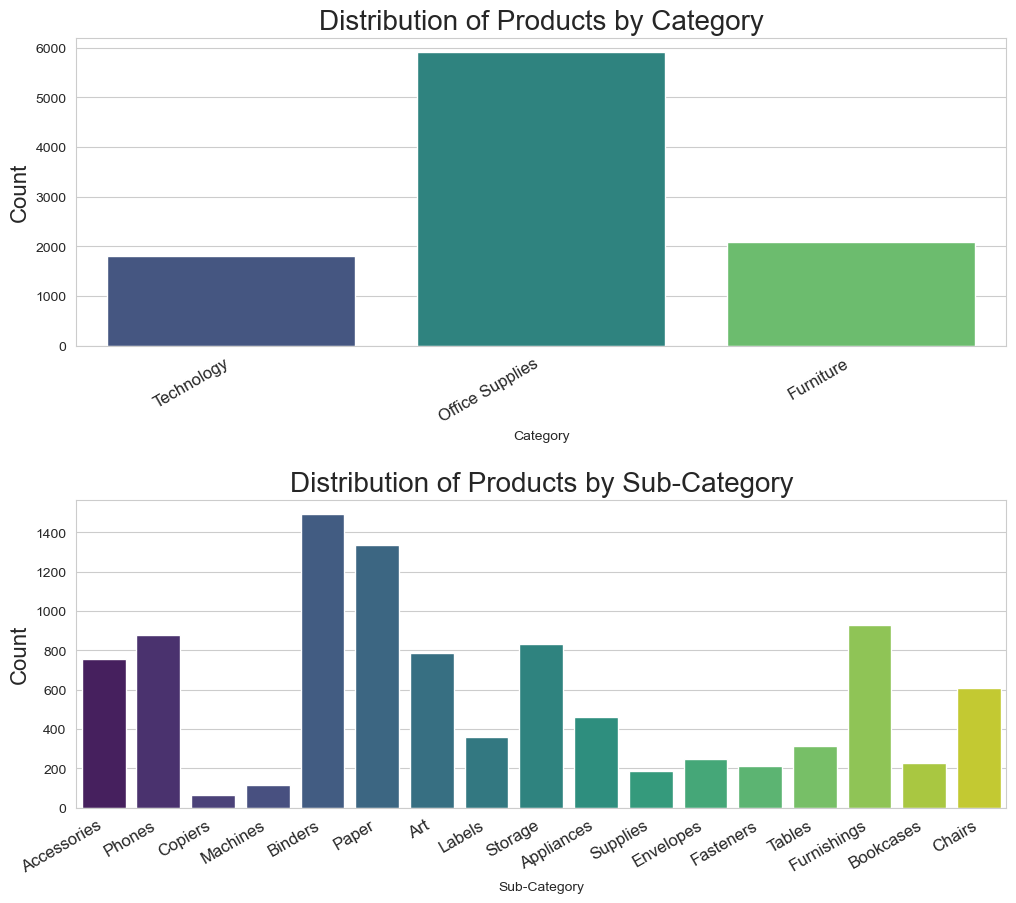

In [59]:
# Assuming df is your DataFrame and 'Category' and 'Sub-Category' are your columns of interest
df = df.sort_values(by='Category', ascending=False)

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = ['Category', 'Sub-Category']

# Create barplots for each column
for i, column in enumerate(columns):
    ax = axes[i]
    sns.countplot(x=column, data=df, palette='viridis', ax=ax)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_title(f'Distribution of Products by {column}', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)

# Display the plots
plt.show()


in the output, we can see that the **Office Supplies** category has the highest number of products, and the **Binders** sub-category has the highest number of products.

#### 3.2 Analyze the distribution of products by sales.
We will be analyzing the distribution of products by sales.

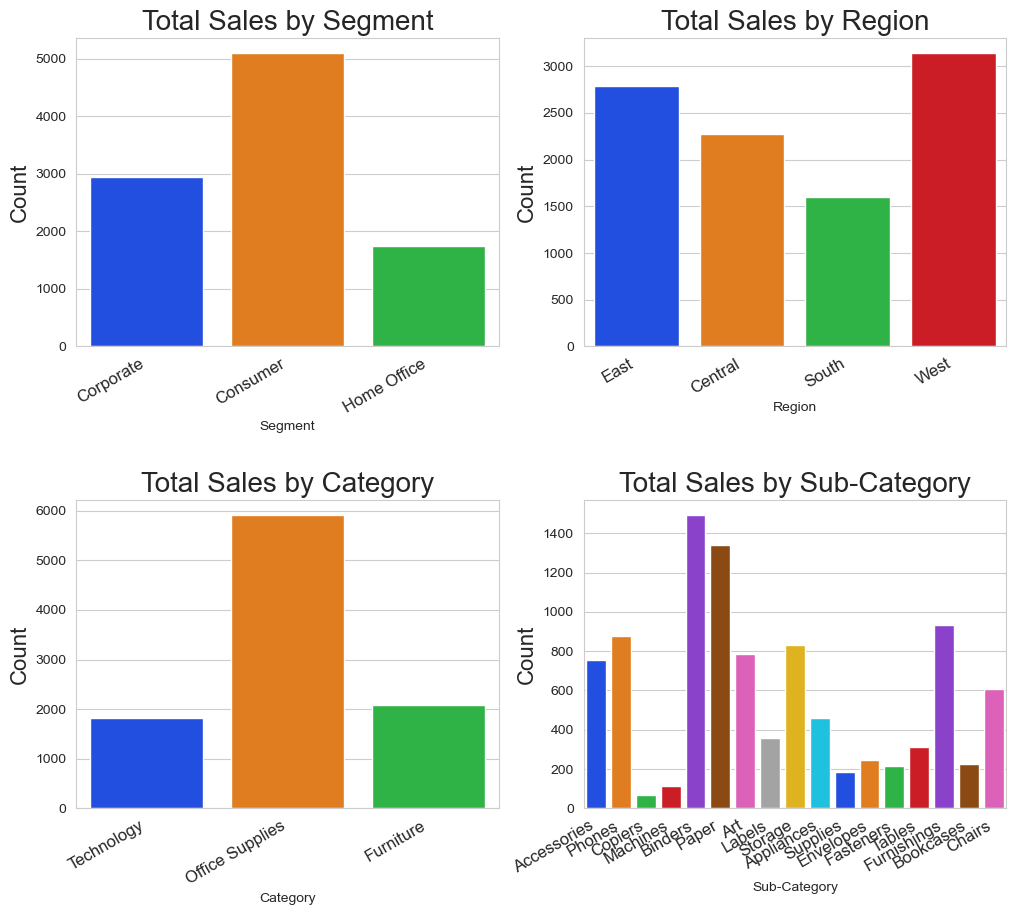

In [74]:
data_sales = df.sort_values(by='Sales', ascending=False)

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

# List of columns to plot
columns = ['Segment', 'Region', 'Category', 'Sub-Category']

# Create barplots for each column
for i, column in enumerate(columns):
    ax = axes[i//2, i%2]
    sns.countplot(x=column, data=df, palette='bright', ax=ax)
    ax.set_ylabel('Count', fontsize=16)
    ax.set_title(f'Total Sales by {column}', fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=12)
    
# Display the plots
plt.show()
    

    
    

In [76]:
df_summary_count = df.groupby(['Category', 'Sub-Category'])['Sales'].count().reset_index()
df_summary_count = df_summary_count.sort_values(by='Sales', ascending=False)

print(df_summary_count)

           Category Sub-Category  Sales
6   Office Supplies      Binders   1492
10  Office Supplies        Paper   1338
2         Furniture  Furnishings    931
16       Technology       Phones    876
11  Office Supplies      Storage    832
5   Office Supplies          Art    785
13       Technology  Accessories    756
1         Furniture       Chairs    607
4   Office Supplies   Appliances    459
9   Office Supplies       Labels    357
3         Furniture       Tables    314
7   Office Supplies    Envelopes    248
0         Furniture    Bookcases    226
8   Office Supplies    Fasteners    214
12  Office Supplies     Supplies    184
15       Technology     Machines    115
14       Technology      Copiers     66


in the output, we can see that the **Office Supplies** category has the highest number of products were sold, and the **Binders** sub-category has the highest number of products were sold. 

In [70]:
# Summarize the Sales data by Category and Sub-Category total sales
df_summary = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Create a nested barplot by Category and Sub-Category

fig = px.sunburst(df_summary, path=['Category', 'Sub-Category'], values='Sales',
                    color='Sales', hover_data=['Sales'],
                    color_continuous_scale='viridis')
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

In [62]:
# sort the data by sales
df_summary = df_summary.sort_values(by='Sales', ascending=False)
print(df_summary)

           Category Sub-Category        Sales
16       Technology       Phones  327782.4480
1         Furniture       Chairs  322822.7310
11  Office Supplies      Storage  219343.3920
3         Furniture       Tables  202810.6280
6   Office Supplies      Binders  200028.7850
15       Technology     Machines  189238.6310
13       Technology  Accessories  164186.7000
14       Technology      Copiers  146248.0940
0         Furniture    Bookcases  113813.1987
4   Office Supplies   Appliances  104618.4030
2         Furniture  Furnishings   89212.0180
10  Office Supplies        Paper   76828.3040
12  Office Supplies     Supplies   46420.3080
5   Office Supplies          Art   26705.4100
7   Office Supplies    Envelopes   16128.0460
9   Office Supplies       Labels   12347.7260
8   Office Supplies    Fasteners    3001.9600


in the output, we can see that the **Technology** category has the highest total sales, and the **Phones** sub-category has the highest total sales.

Although the **Office Supplies** category had the highest number of products sold, it generated less total sales than the **Technology** category. Similarly, within the sub-categories, **Binders** had the highest number of products sold, yet it didn't surpass the total sales of the **Phones** sub-category.


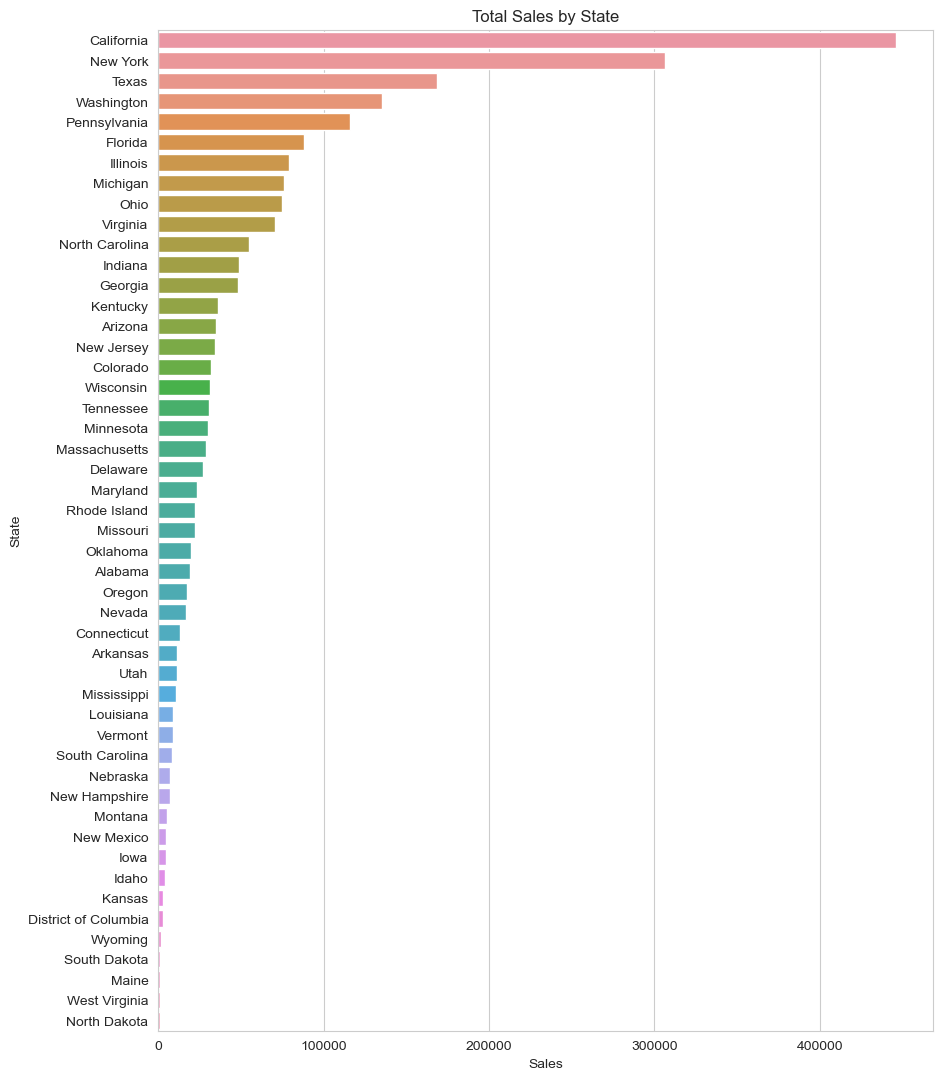

In [63]:
# Group by state and calculate the sum of sales
sum_of_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the DataFrame by the 'Sales' column in descending order
sum_of_sales = sum_of_sales.sort_values(by='Sales', ascending=False)

# Create a horizontal bar graph
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=sum_of_sales)

plt.xlabel('Sales')
plt.ylabel('State')
plt.title('Total Sales by State')
plt.show()

# 4. Model Building